In [50]:

import sys
sys.path.append("../")
import anndata as ad
import numpy as np
from shapely.geometry import Point, Polygon
import rasterio


In [51]:
adata = ad.read_h5ad("/Users/alextran99/Library/CloudStorage/OneDrive-HoustonMethodist/niceview-main_2/db/data/gt-iz-p9-rep2-cell.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 48557 × 3059
    obs: 'n_counts', 'n_genes', 'percent.mt', 'Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs', 'cell_type_original', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'spot_barcodes', 'x', 'y', 'mean_gray', 'std_gray', 'entropy_img', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b', 'spot_heterogeneity', 'node_weights'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'used_for_prediction', '

In [55]:
mapper = rasterio.open("/Users/alextran99/Library/CloudStorage/OneDrive-HoustonMethodist/niceview-main_2/db/cache/gt-iz-p9-rep2-file-name-gis-wsi-img.tiff")

In [56]:
mapper

<open DatasetReader name='/Users/alextran99/Library/CloudStorage/OneDrive-HoustonMethodist/niceview-main_2/db/cache/gt-iz-p9-rep2-file-name-gis-wsi-img.tiff' mode='r'>

In [52]:
drawn_geojson={}
coords=[[[3612, 5418], [3612, 4987], [4606, 4987], [4606, 5418], [3612, 5418]]]

drawn_geojson['features']=[{'type': 'Feature', 'properties': {'type': 'rectangle', '_bounds': [{'lat': -0.004886984819210669, 'lng': 4.5144930481910714}, {'lat': -0.004498064513352827, 'lng': 4.515383541584016}], '_leaflet_id': 302}, 'geometry': {'type': 'Polygon', 'coordinates': [[[4.5144930481910714, -0.004886984819210669], [4.5144930481910714, -0.004498064513352827], [4.515383541584016, -0.004498064513352827], [4.515383541584016, -0.004886984819210669], [4.5144930481910714, -0.004886984819210669]]]}}]

In [66]:
idx = 5
drawn_geojson={}
coords=[[[3612, 5418], [3612, 4987], [4606, 4987], [4606, 5418], [3612, 5418]]]

drawn_geojson['features']=[{'type': 'Feature', 'properties': {'type': 'rectangle', '_bounds': [{'lat': -0.004886984819210669, 'lng': 4.5144930481910714}, {'lat': -0.004498064513352827, 'lng': 4.515383541584016}], '_leaflet_id': 302}, 'geometry': {'type': 'Polygon', 'coordinates': [[[4.5144930481910714, -0.004886984819210669], [4.5144930481910714, -0.004498064513352827], [4.515383541584016, -0.004498064513352827], [4.515383541584016, -0.004886984819210669], [4.5144930481910714, -0.004886984819210669]]]}}]
mapper = rasterio.open("/Users/alextran99/Library/CloudStorage/OneDrive-HoustonMethodist/niceview-main_2/db/cache/gt-iz-p9-rep2-file-name-gis-wsi-img.tiff")
mapper = mapper.index
cell_adata=adata.copy()
for region in drawn_geojson['features']:
    temp = region['geometry']['coordinates'][0]
    temp = [mapper(*point) for point in temp]
    temp = [[point[1], point[0]] for point in temp]  # y, x -> x, y
    coords.append(temp)

target = np.array([])
for coord in coords:
    roi = Polygon(coord)
    locs = list(map(lambda x: roi.contains(Point(x)), cell_adata.obsm['spatial']))
    print(len(locs))
    to_keep = cell_adata[locs].copy()
    try:
        array =to_keep.X[:, idx].ravel()
    except AttributeError:
        array =to_keep.X[:, idx].toarray().ravel()
    target = np.concatenate((target, array))

48557
48557


In [64]:
target

array([0.67979503, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [62]:
to_keep.X

<571x3059 sparse matrix of type '<class 'numpy.float32'>'
	with 337036 stored elements in Compressed Sparse Row format>

In [25]:
var_keep=[]
for i in range(0,5):
    var_keep.append(adata.obs.index[i])

In [26]:
adata.obs["try"]=False

In [27]:
for i in range(len(adata.obs.index)):
    a=adata.obs.index[i]
    if a in var_keep:
        adata.obs["try"][i]=True

/Users/alextran99/miniconda3/envs/cellDancer/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
adata.obs["try"]

CAATTTGACCGGGAAG-1        True
AATGCACCAAGCAATG-1        True
TGTGACTAGAGTTTGC-1        True
TACGTGCACTATGCTG-1        True
CTCTTCTATTGACTGG-1        True
                         ...  
CACAGGGCCATATAGT-1-21    False
TAATAGAACAGAGTTA-1-14    False
GAATTCACCCGGGTGT-1-18    False
AGCGCATAATGAATCG-1-4     False
CGCTCTCCGTAGATTA-1-14    False
Name: try, Length: 48557, dtype: bool

In [31]:
adata1 = adata[adata.obs["try"]].copy()

In [36]:
adata1.X

<5x3059 sparse matrix of type '<class 'numpy.float32'>'
	with 3779 stored elements in Compressed Sparse Row format>

In [32]:
idx=5

In [40]:
array= adata1.X[:, idx].todense().ravel()

In [41]:
array

matrix([[0.        , 0.63925326, 0.50333494, 0.        , 0.91629076]],
       dtype=float32)

In [42]:
target = np.array([])
target = np.concatenate((target, array))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [17]:
luck=list(adata.var["try"])

In [18]:
adata.var[luck]

,feature_is_filtered,feature_name,feature_reference,feature_biotype,highly_variable,means,dispersions,dispersions_norm,used_for_prediction,used_for_vae,used_for_reduced,try
feature_id,,,,,,,,,,,,
ENSG00000211772,False,TRBC2,NCBITaxon:9606,gene,True,0.172748,0.605533,0.840074,True,False,False,True
ENSG00000168172,False,HOOK3,NCBITaxon:9606,gene,True,0.461210,0.588796,0.526172,True,False,False,True
ENSG00000204271,False,SPIN3,NCBITaxon:9606,gene,True,0.085301,0.810396,1.746955,True,False,False,True
ENSG00000230424,False,EMC1-AS1,NCBITaxon:9606,gene,True,0.077707,0.611928,0.868384,True,False,False,True
ENSG00000165714,False,BORCS5,NCBITaxon:9606,gene,True,0.086386,0.679632,1.168093,True,False,False,True


In [22]:
adata

AnnData object with n_obs × n_vars = 48557 × 3059
    obs: 'n_counts', 'n_genes', 'percent.mt', 'Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs', 'cell_type_original', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'spot_barcodes', 'x', 'y', 'mean_gray', 'std_gray', 'entropy_img', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b', 'spot_heterogeneity', 'node_weights'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'used_for_prediction', '

In [21]:
adata1=adata[luck].copy()

IndexError: Boolean index does not match AnnData’s shape along this dimension. Boolean index has shape (3059,) while AnnData index has shape (48557,).

In [20]:
adata1

,feature_is_filtered,feature_name,feature_reference,feature_biotype,highly_variable,means,dispersions,dispersions_norm,used_for_prediction,used_for_vae,used_for_reduced,try
feature_id,,,,,,,,,,,,
ENSG00000211772,False,TRBC2,NCBITaxon:9606,gene,True,0.172748,0.605533,0.840074,True,False,False,True
ENSG00000168172,False,HOOK3,NCBITaxon:9606,gene,True,0.461210,0.588796,0.526172,True,False,False,True
ENSG00000204271,False,SPIN3,NCBITaxon:9606,gene,True,0.085301,0.810396,1.746955,True,False,False,True
ENSG00000230424,False,EMC1-AS1,NCBITaxon:9606,gene,True,0.077707,0.611928,0.868384,True,False,False,True
ENSG00000165714,False,BORCS5,NCBITaxon:9606,gene,True,0.086386,0.679632,1.168093,True,False,False,True


In [79]:
import re
file_path ="/Users/alextran99/Downloads/try1.js"
# Read the file
# Read the file content
with open(file_path, 'r') as file:
    content = file.read()
new_number = "e*5.55"
# Define the pattern to match the line you want to replace
pattern = r'_updateMetric:function\(t\){var e=this\._getRoundNum\(t\),n=e\*[-+]?\d*\.\d+\.toFixed\(2\)\+'

# Define the replacement string
replacement = r'_updateMetric:function(t){var e=this._getRoundNum(t),n=' + new_number + '.toFixed(2)+'

# Perform the replacement
new_content = re.sub(pattern, replacement, content)

# Save the modified content back to the file
with open(file_path, 'w') as file:
    file.write(new_content)





'/*! For license information please see dash_leaflet.js.LICENSE.txt */\n!function(t,e){"object"==typeof exports&&"object"==typeof module?module.exports=e(require("react"),require("react-dom")):"function"==typeof define&&define.amd?define(["react","react-dom"],e):"object"==typeof exports?exports.dash_leaflet=e(require("react"),require("react-dom")):t.dash_leaflet=e(t.React,t.ReactDOM)}(self,((t,e)=>(()=>{var n,i,o,r,a={1304:(t,e,n)=>{"use strict";n.d(e,{Z:()=>s});var i=n(8081),o=n.n(i),r=n(3645),a=n.n(r)()(o());a.push([t.id,".leaflet-bar button,\\n.leaflet-bar button:hover {\\n  background-color: #fff;\\n  border: none;\\n  border-bottom: 1px solid #ccc;\\n  width: 26px;\\n  height: 26px;\\n  line-height: 26px;\\n  display: block;\\n  text-align: center;\\n  text-decoration: none;\\n  color: black;\\n}\\n\\n.leaflet-bar button {\\n  background-position: 50% 50%;\\n  background-repeat: no-repeat;\\n  overflow: hidden;\\n  display: block;\\n}\\n\\n.leaflet-bar button:hover {\\n  backgroun
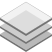
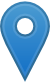
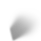

In [70]:
new_content

In [82]:
from pyproj import Geod
gis_img_path = "../db/cache/0b724ba0-623f-11ee-b5c9-e450ebb96603-Visium_5_CK283-gis-wsi-img.tiff"
actual_distance=1e-6
with rasterio.open(gis_img_path) as src:        
    lat1, lon1 = src.xy(0, 0)
    lat2, lon2 = src.xy(0, 1)
g = Geod(ellps='clrk66') 
_, _, dist = g.inv(lon1, lat1, lon2, lat2)
factor = actual_distance / dist * 10 ** 6  # first convert to meter then convert to micrometer

In [83]:
factor

10.094657109482748

In [ ]:
from dash import Dash, Input, Output, State, html, dcc
import dash_bootstrap_components as dbc
import dash_daq as daq


app = Dash(
    __name__, external_stylesheets=[dbc.themes.VAPOR], prevent_initial_callbacks=True
)


countdown_store = dcc.Store(id="countdown-store")
running_countdown_store = dcc.Store(id="running-countdown-store")

interval = dcc.Interval(
    id="countdown-interval", interval=1000, n_intervals=0
)

countdown_input = dcc.Input(
    id="countdown-input",
    type="number",
    min=0,
    step=1,
    size="lg",
    style={"font-size": "1.6rem"},
    className="mb-3",
)

button = dbc.Button(
    id="countdown-button",
    children="Start Countdown",
    n_clicks=0,
    size="lg",
    style={"font-size": "1.6rem"},
    color="primary",
    className="me-1",
)

led_display = daq.LEDDisplay(
    id="countdown-display",
    value="0:0:0:0:0:0",
    label={
        "label": "Time in years : months : days : hours : minutes : seconds",
        "style": {"font-size": "1.6rem", "text-align": "center"},
    },
    backgroundColor="black",
    color="red",
    labelPosition="bottom",
    size=75,
)

audio_div = html.Div(id="audio-div")

app.layout = dbc.Container(
    [
        countdown_store,
        running_countdown_store,
        interval,
        audio_div,
        dbc.Row(
            [
                dbc.Col(
                    [html.H2("Enter countdown in seconds"), countdown_input, button],
                    lg=6,
                )
            ],
            justify="center",
            style=dict(textAlign="center"),
            className="d-flex justify-content-center",
        ),
        dbc.Row(
            [dbc.Col([led_display], lg=6, style=dict(textAlign="center"))],
            justify="center",
            className="mt-4",
        ),
    ],
    className="p-4",
    fluid=True,
)


@app.callback(
    Output("countdown-store", "data"),
    Output("countdown-interval", "n_intervals"),
    Input("countdown-button", "n_clicks"),
    State("countdown-input", "value"),
)
def init_countdown_store(n_clicks, countdown_input):

    if n_clicks > 0:

        return countdown_input, 0


@app.callback(
    Output("running-countdown-store", "data"),
    Input("countdown-store", "data"),
    Input("countdown-interval", "n_intervals"),
)
def init_running_countdown_store(seconds, n_intervals):

    if seconds is not None:

        running_seconds = seconds - n_intervals
        if running_seconds >= 0:
            return running_seconds
        else:
            return 0


@app.callback(
    Output("countdown-display", "value"),
    Output("countdown-display", "label"),
    Output("audio-div", "children"),
    Input("running-countdown-store", "data"),
)
def update_countdown_display(seconds):

    audio = html.Div()

    if seconds is not None:

        mins, secs = divmod(seconds, 60)
        hours, mins = divmod(mins, 60)
        days, hours = divmod(hours, 24)
        months, days = divmod(days, 30)
        years, months = divmod(months, 12)

        label_str = (
            is_non_zero(seconds) * "Time in "
            + is_non_zero(years) * "years: "
            + is_non_zero(months) * "months: "
            + is_non_zero(days) * "days: "
            + is_non_zero(hours) * "hours: "
            + is_non_zero(mins) * "minutes: "
            + is_non_zero(secs) * "seconds: "
        )
        if seconds == 0:
            audio = html.Audio(
                src="./assets/clock-alarm-8761.mp3", controls=False, autoPlay=True
            )

        return (
            f"{years}:{months}:{days}:{hours}:{mins}:{secs}".replace("0:", ""),
            {
                "label": label_str[:-2],
                "style": {"font-size": "1.6rem", "text-align": "center"},
            },
            audio,
        )

    else:
        return (
            "0:0:0:0:0:0",
            {
                "label": "Time in years : months : days : hours : minutes : seconds",
                "style": {"font-size": "1.6rem", "text-align": "center"},
            },
            audio,
        )


def is_non_zero(number):
    return {True: 1, False: 0}[number != 0]


if __name__ == "__main__":
    app.run_server(debug=True)